## Linear Regression : Prediction of Housing Price



### Import all neccessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### Load the Dataset

In [2]:
#dataset
df = pd.read_csv("/content/AmesHousing.csv")

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#Creating a copy of original dataframe
df1 = df.copy()

### EDA

In [5]:
print("Dataset Shape:",df1.shape)

Dataset Shape: (2930, 82)


In [6]:
df1.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [7]:
#dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
#Statistical Summary
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [9]:
#Cleaning of column names
df1.columns = (
    df1.columns
    .str.strip()                #remove trailing/leading spaces
    .str.replace(" ","_")       #replace space with underscore
    .str.replace("-","_")       #replace hypen with underscore
)

In [10]:
print("The Cleaned Columns are : \n",df1.columns)

The Cleaned Columns are : 
 Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area',
       'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities',
       'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Roof_Style',
       'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type',
       'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual',
       'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
       'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       'Heating', 'Heating_QC', 'Central_Air', 'Electrical', '1st_Flr_SF',
       '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath',
       'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr',
       'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace_Qu', 'Garage_Ty

In [11]:
#Missing/null values
df1.isna().sum().sort_values(ascending=False).head(28)

,0
Pool_QC,2917
Misc_Feature,2824
Alley,2732
Fence,2358
Mas_Vnr_Type,1775
Fireplace_Qu,1422
Lot_Frontage,490
Garage_Qual,159
Garage_Yr_Blt,159
Garage_Cond,159


In [12]:
#Separating Numerical and Categorical Columns
num_cols = df1.select_dtypes(include=['int64','float64']).columns
cat_cols = df1.select_dtypes(include=['object']).columns

In [13]:
#Filling the missing values in numerical cols  with "Median"
df1[num_cols] = df1[num_cols].fillna(df1[num_cols].median())

In [14]:
#Filling the missing values in categorical cols with "Mode"
df1[cat_cols] = df1[cat_cols].fillna(df1[cat_cols].mode().iloc[0])

### EDA Visualizations

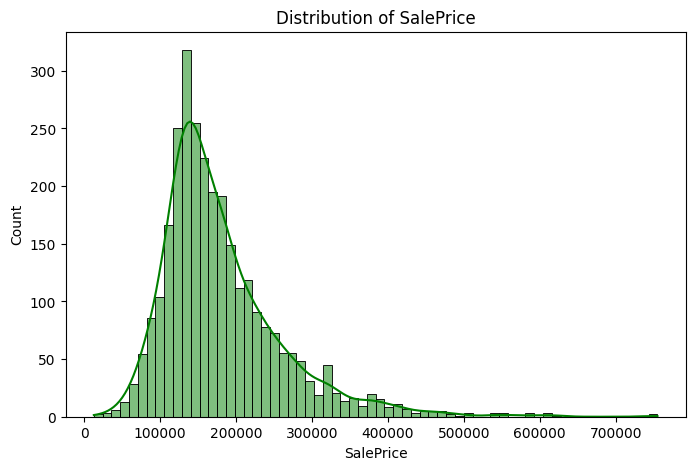

In [15]:
#Distribution of Target Variable(SalePrice)

plt.figure(figsize=(8,5))
sns.histplot(df1["SalePrice"],kde=True,color="green")
plt.title("Distribution of SalePrice")
plt.show()

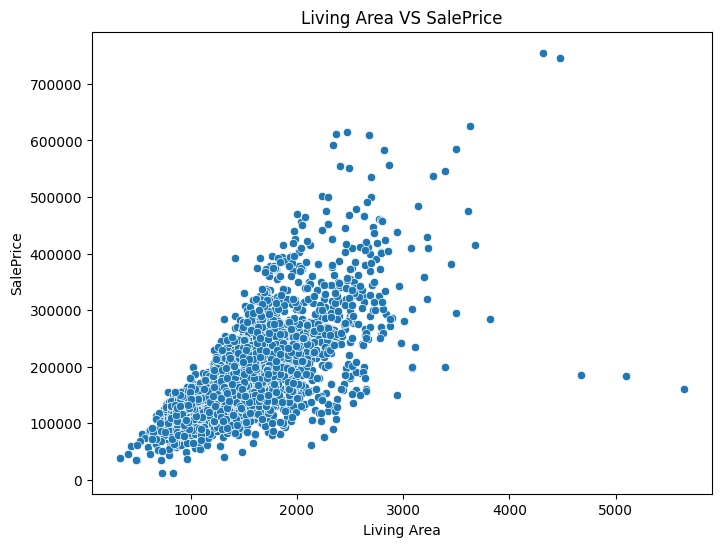

In [16]:
#Relationship between GrLivArea and SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1['Gr_Liv_Area'],y=df1['SalePrice'])
plt.xlabel("Living Area")
plt.ylabel("SalePrice")
plt.title("Living Area VS SalePrice")
plt.show()

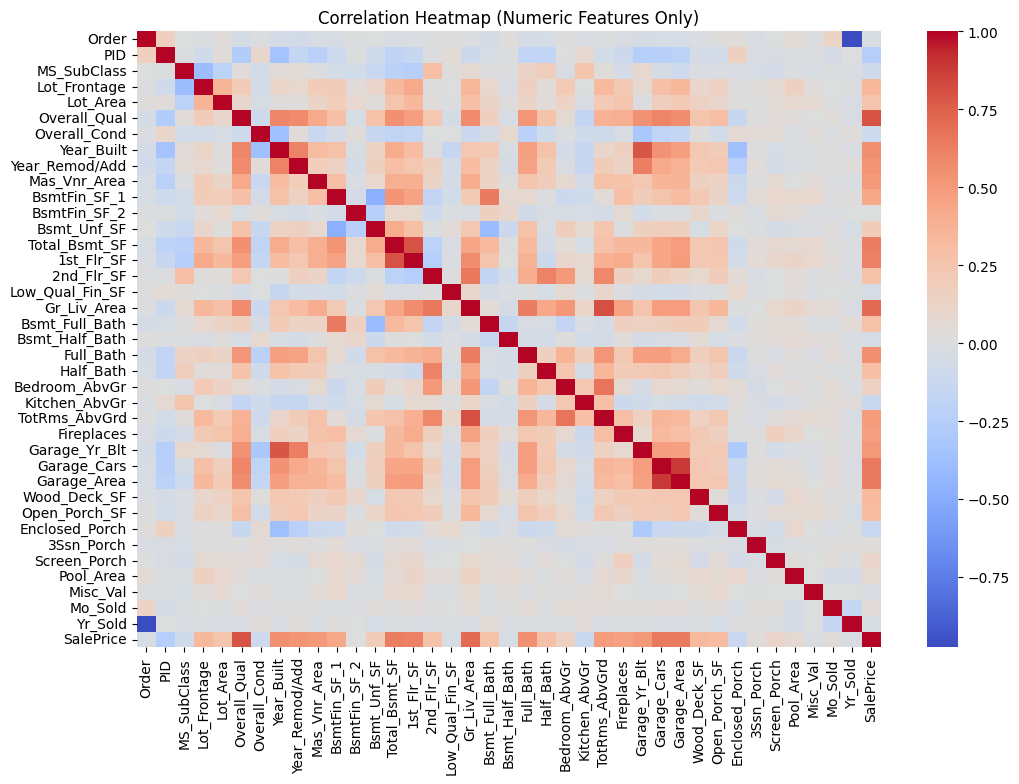

In [17]:
#Correlation Heatmap => Only Numerical Features
plt.figure(figsize=(12,8))
sns.heatmap(df1.select_dtypes(include=["int64","float64"]).corr(),cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [18]:
#Top Features Correlated with SalePrice

corr = df1.select_dtypes(include = ["int64","float64"]).corr()
top_corr = corr["SalePrice"].sort_values(ascending=False).head(15)
print(top_corr)

SalePrice         1.000000
Overall_Qual      0.799262
Gr_Liv_Area       0.706780
Garage_Cars       0.647812
Garage_Area       0.640381
Total_Bsmt_SF     0.632164
1st_Flr_SF        0.621676
Year_Built        0.558426
Full_Bath         0.545604
Year_Remod/Add    0.532974
Garage_Yr_Blt     0.508882
Mas_Vnr_Area      0.502196
TotRms_AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin_SF_1      0.432862
Name: SalePrice, dtype: float64


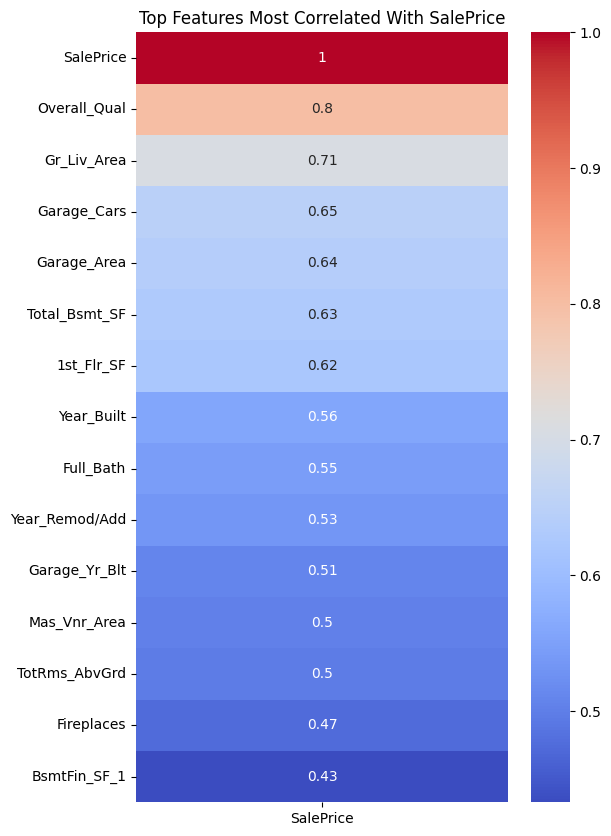

In [19]:
plt.figure(figsize=(6,10))
sns.heatmap(top_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Top Features Most Correlated With SalePrice")
plt.show()


### Model Building Steps

In [20]:
#Selecting X and Y features

top_features = top_corr.index.tolist()
top_features.remove("SalePrice")

X = df1[top_features]
y = df1["SalePrice"]

In [21]:
#Train & Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#Model Building =>Linear Regression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
#Make Prediction

y_pred = model.predict(X_test)

In [24]:
#Model Evaluation

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print("The Model Performance:\n")
print("MSE-",mse)
print("RMSE-",rmse)
print("R2_Score-",r2)

The Model Performance:

MSE- 1368770432.0150898
RMSE- 36996.89759986761
R2_Score- 0.8292781728515198


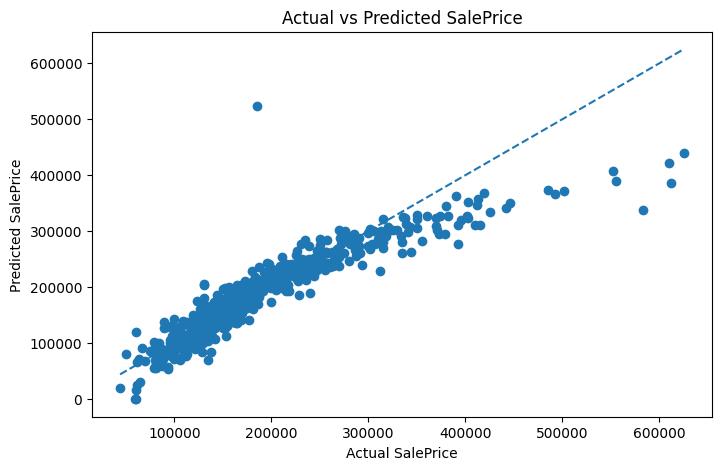

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')       # perfect prediction line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice")
plt.show()
